*   Student name: **[Michael Cordero]**
*   Student Panther ID: **[6331927]**
*   Collaborator(s): **[N/A]**
*   **Notice on Academic Misconduct**: Sharing your codes with other students is also an academic misconduct. If your submission is found unsually similar to that of another student, you will be reported to the SCAI as a potential academic misconduct case, regardless of your reasons. Violations may lead to suspension or expulsion from the university.

# CAP5602 Homework 2 (15% total grade)

## **Deadline: 10/3/2022 11:59 PM**

In this homework, we will train, test, and visualize the K-NN and decision tree models on a simple 1d regression dataset.

## 1. Generate dataset (2% total grade)

Write Python code to generate a regression dataset that contains 250 examples. In this dataset, each input $x$ is drawn uniformly random from (0, 2) and the corresponding output is $y = x^3 - 3x^2 + 2x + \epsilon$, where $\epsilon$ is Gaussian noise with zero mean and standard deviation 0.04.

You don't need to define a function, but your code should create variables that contain all the inputs and outputs. You should also fix a random seed so that your results are reproducible.

In [47]:
# Write your code here
import numpy as np

np.random.seed(0)
n_samples = 250
x = np.sort(2 * np.random.rand(n_samples, 1), axis=0)
y = np.apply_along_axis(lambda i: sum(i**3 - 3*i**2 + 2*i + np.random.normal(loc=0, scale=0.4, size=(n_samples, 1))), axis=1, arr=x)

## 2. Split dataset into train/test sets (1% total grade)

Write code to randomly split your dataset above into a train set and a test set. Your train set should contain 150 examples and your test set should contain 100 examples.

In [48]:
# Write your code here
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=100, train_size=150, random_state=42)

## 3. Define a K-NN model (1% total grade)

Write code to define a K-NN regression model with K=5 and the neighbors are weighted by the inverse of their distance.

In [49]:
# Write your code here
from sklearn import neighbors
n_neighbors = 5
weight = 'distance'
knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weight)

## 4. Train your K-NN model (1% total grade)

Write code to train your K-NN model on your train set.

In [50]:
# Write your code here
knn.fit(X_train,Y_train)

KNeighborsRegressor(weights='distance')

## 5. Make prediction with your K-NN model (1% total grade)

Write code to predict the outputs of your K-NN model on the test set.

In [51]:
# Write your code here
Y_prediction = knn.predict(X_test)

## 6. Compute the MSE (1% total grade)

Write code to compute and print out the mean squared error (MSE) of your K-NN model on the test set

In [52]:
# Write your code here
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_prediction)
print(mse)

65.07923331904044


## 7. Visualize your K-NN model (2% total grade)

Write code to plot the predictions of your K-NN model on [0, 2]. You should generate 100 evenly-spaced points on [0, 2], use your K-NN model to predict their outputs, and plot them as a line graph. Your plot must also contain the train set, the test set, and the legend. Play with the settings to make your plot clear and readable.

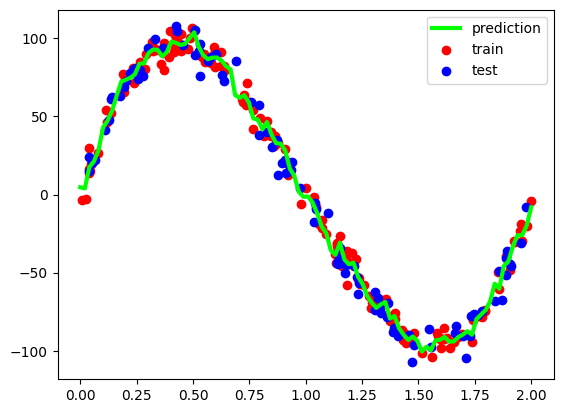

In [53]:
# Write your code here
import matplotlib.pyplot as plt
# generate 100 points evenly spaced on the domain [0,2]
xd = np.linspace(0,2,100).reshape(-1,1)
# make prediction on the newly generated x-inputs
yd= knn.predict(xd)
# Plot a line connecting the points
plt.plot(xd, yd, color="lime", label="prediction", linewidth=3)
# Plot the training set
plt.scatter(X_train, Y_train, color="r", label="train")
# Plot the test set
plt.scatter(X_test, Y_test, color="b", label="test")
# Add legend
plt.legend()
# Show the plot
plt.show()

## 8. Train and test a decision tree model (2% total grade)

Write code to train a decision tree model on your train set above and then print out its MSE on the test set. Use sklearn's default setting for your model.

In [54]:
# Write your code here
from sklearn import tree

tree_model = tree.DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)
TY_prediction = tree_model.predict(X_test)
tree_mse = mean_squared_error(Y_test, TY_prediction)
print(tree_mse)

81.18890041857537


## 9. Visualize your decision tree model (2% total grade)

Repeat Question 7 with your trained decision tree model. Your code should generate a plot similar to that of Question 7. **Do not** plot the actual tree with graphviz.

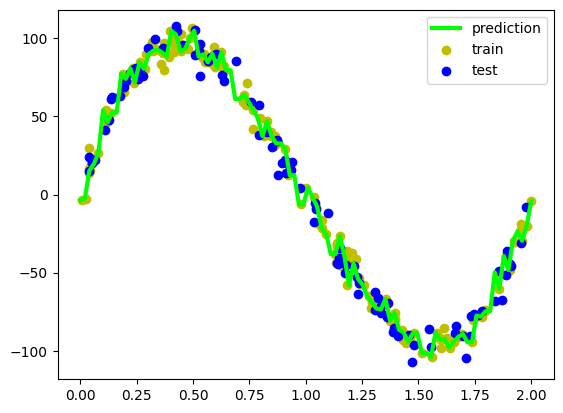

In [55]:
# Write your code here
# generate 100 points evenly spaced on the domain [0,2]
xt = np.linspace(0,2,100).reshape(-1,1)
# make prediction on the newly generated x-inputs
yt = tree_model.predict(xt)
# plot a line connecting the points
plt.plot(xt,yt, color="lime", label="prediction", linewidth=3)
# Plot the training set
plt.scatter(X_train, Y_train, color="y", label="train")
# Plot the test set
plt.scatter(X_test, Y_test,  color="b", label="test")
# Add legend
plt.legend()
# Show the plot
plt.show()

## 10. Compare decision tree and K-NN (2% total grade)

According to the above results, which model is better on your dataset (K-NN or decision tree)? Why?

**Your answer**: KNN is the better model because it's mean squared error(MSE) is less than the Decision Tree's MSE.